### A notebook for WIND energy in Germany.
##### A simple analysis inspired by a kaggle notebook
### About the dataset
#### Temperature and wind energy production 2017-2019¶grees C

### Content
##### This dataset is pretty simple, It's a time series dataset containing measurements of daily temperature, wind production and capacity from 2017 to 2019.
##### The columns in the dataset are :
##### utc_timestamp : Time in UTC
##### wind_generation : Daily wind production in MW
##### wind_capacity : Electrical capacity of wind in MW
##### temperature : Daily Temperature in degrees C

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_csv('germany-wind-energy.csv')
df.head(3)

utc_timestamp  wind_generation_actual  wind_capacity  \
0  2017-01-01 00:00:00+00:00                291760.0      37149.130   
1  2017-01-02 00:00:00+00:00                295097.0      37152.125   
2  2017-01-03 00:00:00+00:00                666170.0      37155.208   

   temperature  
0       -2.117  
1       -1.154  
2       -0.239

In [3]:
df.describe().round(2).T

count       mean        std       min        25%  \
wind_generation_actual  1094.0  305819.77  205728.86  16482.00  148552.75   
wind_capacity           1094.0   45066.02    4315.84  37149.13   41447.94   
temperature             1094.0      10.05       7.74     -9.36       3.58   

                              50%        75%        max  
wind_generation_actual  254332.50  412570.50  998899.00  
wind_capacity            46073.00   49203.00   50452.00  
temperature                 10.05      16.57      28.24

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   utc_timestamp           1094 non-null   object 
 1   wind_generation_actual  1094 non-null   float64
 2   wind_capacity           1094 non-null   float64
 3   temperature             1094 non-null   float64
dtypes: float64(3), object(1)
memory usage: 34.3+ KB


##### Here is no missing data but the data format has to be changed

In [5]:
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])
df = df.rename(columns={'utc_timestamp' : 'date'})

Text(0.5, 1.0, 'The temperature and production by wind')

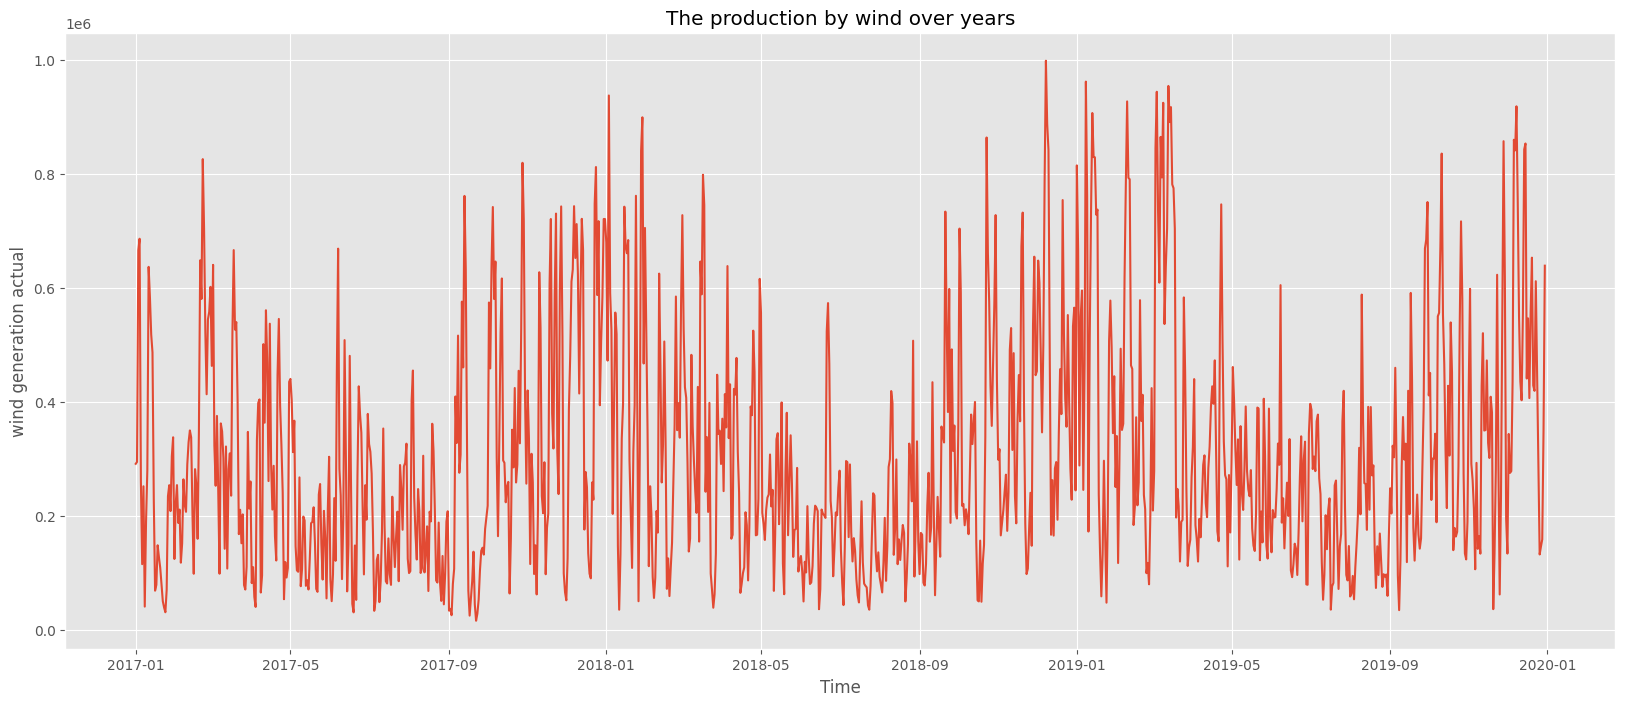

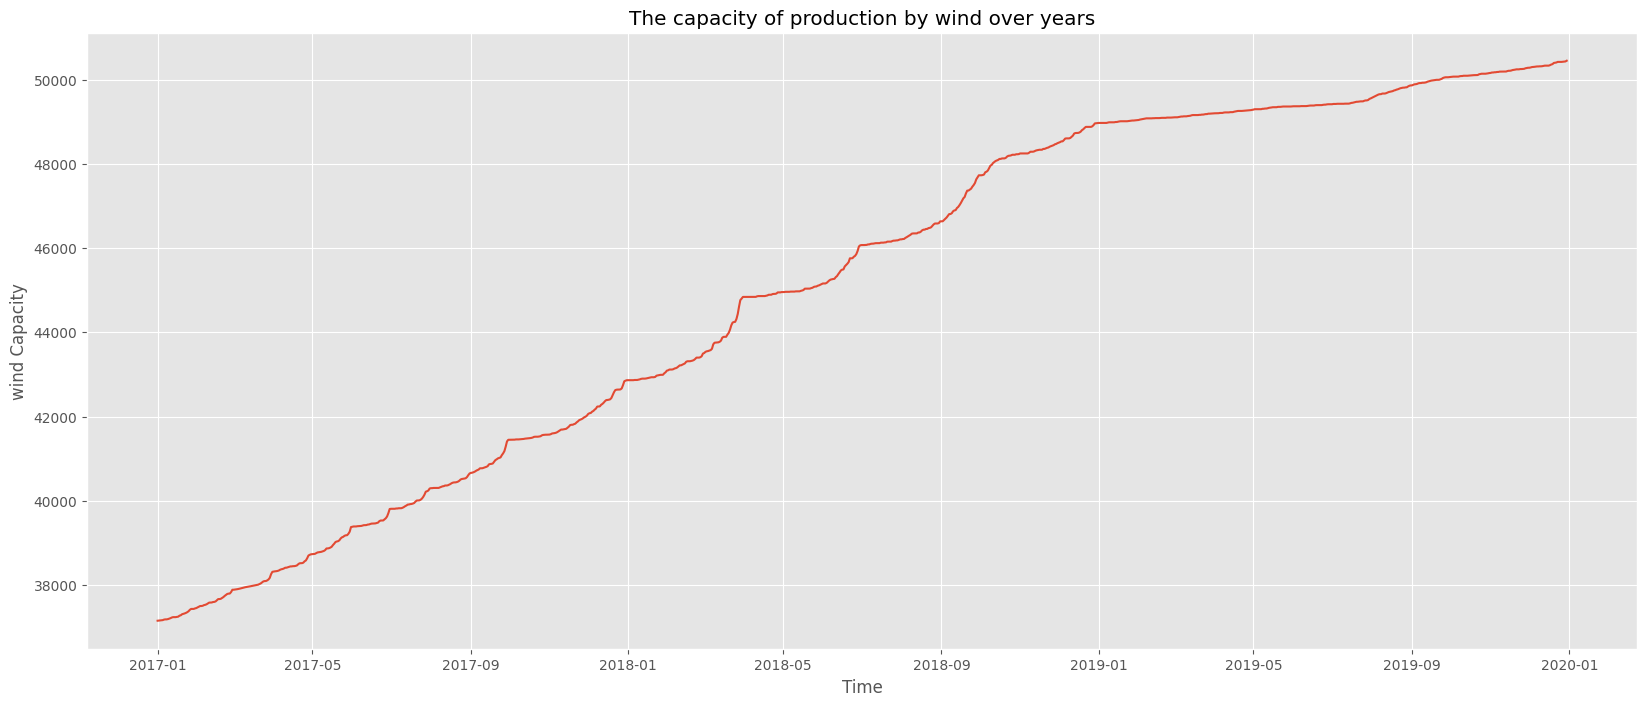

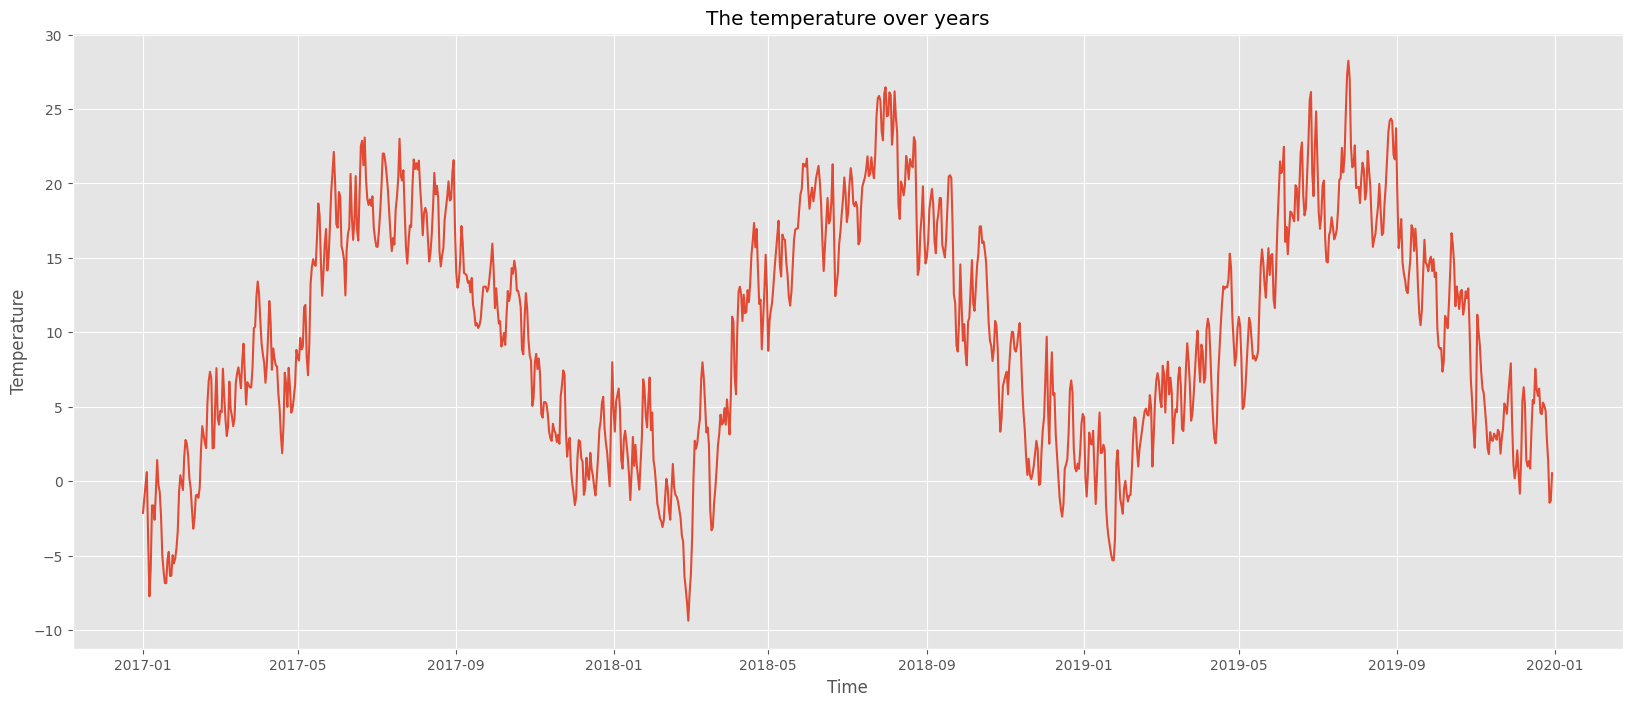

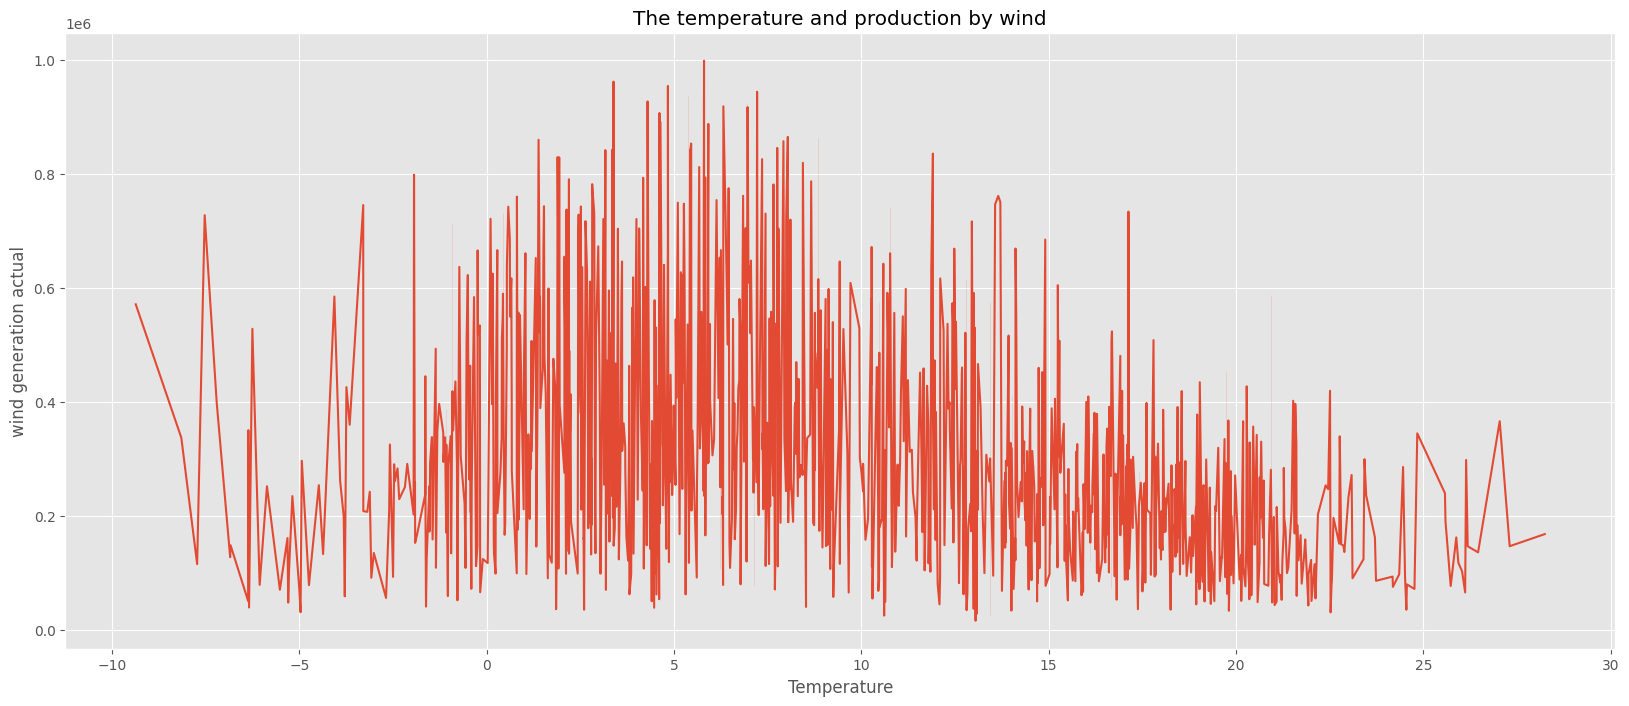

In [6]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='date',y='wind_generation_actual')
plt.xlabel('Time')
plt.ylabel('wind generation actual')
plt.title('The production by wind over years')

plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='date',y='wind_capacity')
plt.xlabel('Time')
plt.ylabel('wind Capacity')
plt.title('The capacity of production by wind over years')

plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='date',y='temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('The temperature over years')

plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='temperature',y='wind_generation_actual')
plt.xlabel('Temperature')
plt.ylabel('wind generation actual')
plt.title('The temperature and production by wind')

##### 1st graph : there is seasonal pattern in the production
##### 2nd graph : production capacity increased over years
##### 3rd graph : temperature increased in summer season
##### 4th graph : the production by wind in different temperature can be seen here. we can notice that 0 to 8 degree is quite good for best production.

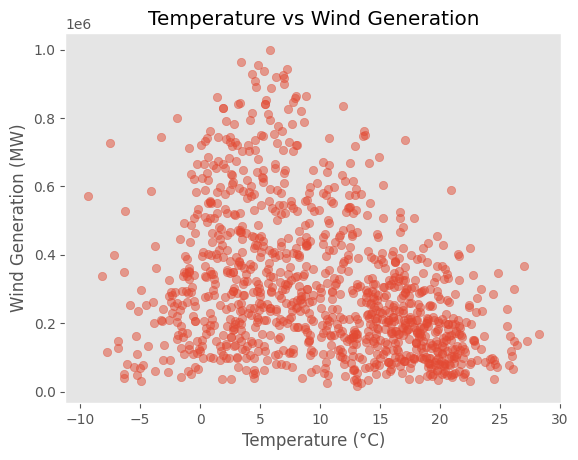

In [7]:
plt.scatter(df['temperature'], df['wind_generation_actual'], alpha=0.5)
plt.title('Temperature vs Wind Generation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Generation (MW)')
plt.grid()
plt.show()

C:\Users\smari\AppData\Roaming\Python\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


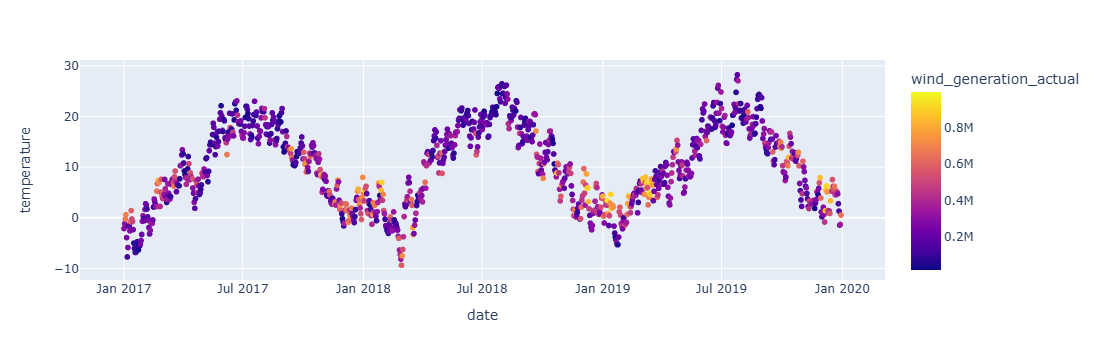

In [8]:
fig = px.scatter(df, x='date', y='temperature', color='wind_generation_actual')
fig.show()

In [9]:
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.day
df['weekday'] = df['date'].dt.day_name()


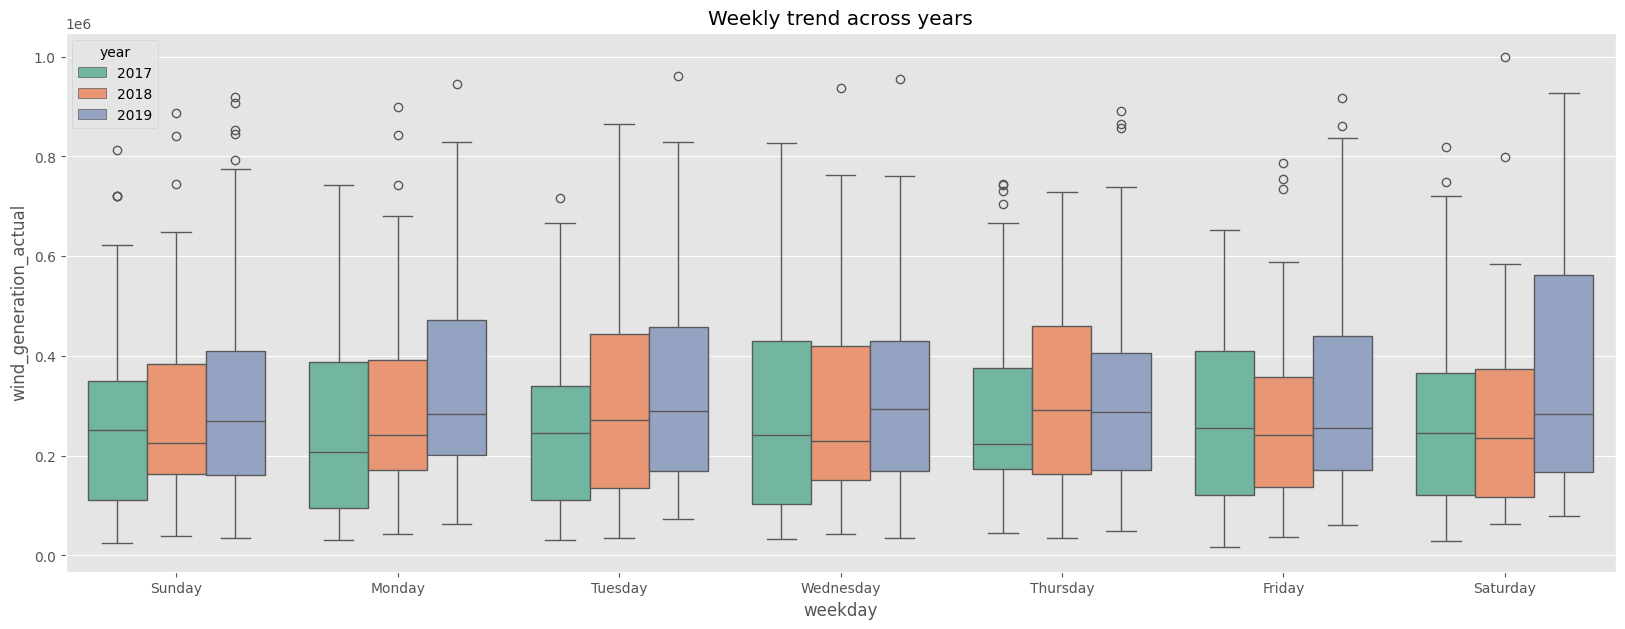

In [10]:
fig,axes = plt.subplots(1,1,figsize=(20,7))
sns.boxplot(data = df,x='weekday',y='wind_generation_actual',hue='year',palette='Set2',ax=axes)
plt.title('Weekly trend across years')
plt.show()

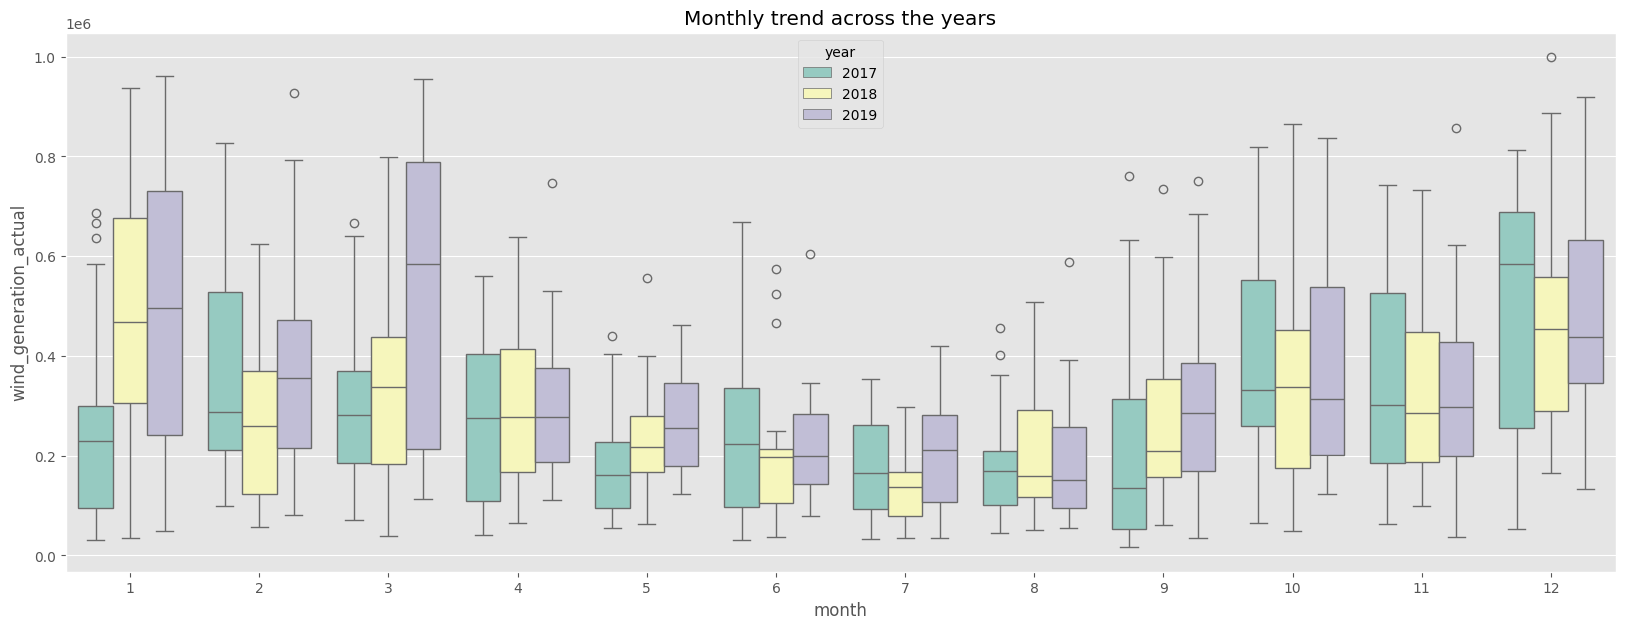

In [11]:
fig,axes = plt.subplots(1,1,figsize=(20,7))
sns.boxplot(data = df,x='month',y='wind_generation_actual',hue='year',palette='Set3',ax=axes)
plt.title('Monthly trend across the years')
plt.show()

#### avg. the summer season is not good for this power production.

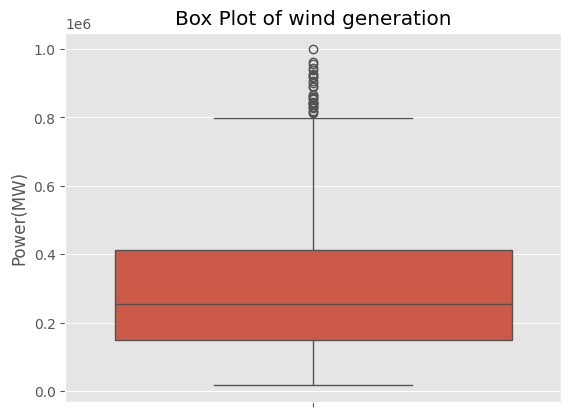

In [12]:
sns.boxplot(data=df['wind_generation_actual'])
plt.title('Box Plot of wind generation')
plt.ylabel('Power(MW)')
plt.show()

##### there are some outliers inside the data.

In [13]:
Q1 = df.wind_generation_actual.quantile(0.25)
Q3 = df.wind_generation_actual.quantile(0.75)
IQR = Q3-Q1
df['iqr_outlier_flag'] = (df.wind_generation_actual>Q3+IQR*1.5) | (df.wind_generation_actual<0)
print(f"The upper whisker is {Q3+IQR*1.5} , lower whisker 0")
print(f"We have following number of outliers : {df['iqr_outlier_flag'].sum()}")

The upper whisker is 808597.125 , lower whisker 0
We have following number of outliers : 30


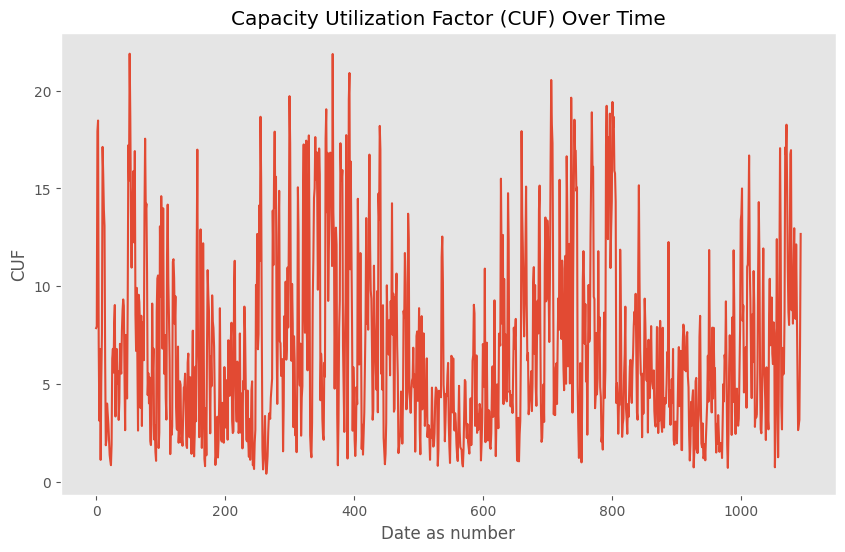

In [14]:
df['CUF'] = df['wind_generation_actual'] / df['wind_capacity']

df['CUF'].plot(figsize=(10, 6))
plt.title('Capacity Utilization Factor (CUF) Over Time')
plt.xlabel('Date as number')
plt.ylabel('CUF')
plt.grid()
plt.show()

In [15]:
print(df['CUF'].describe())

count    1094.000000
mean        6.793693
std         4.543175
min         0.401940
25%         3.236328
50%         5.658069
75%         9.179512
max        21.894986
Name: CUF, dtype: float64


In [16]:
# daily variablity and reliablity

daily_variability = df['wind_generation_actual'].std()
print(f'Daily Variability: {daily_variability} MW')

reliable_days = df[df['CUF'] > 0.8].shape[0]
print(f"Days with CUF > 80%: {reliable_days}")

Daily Variability: 205728.85791492622 MW
Days with CUF > 80%: 1085


In [17]:
correlation_matrix = df[['wind_generation_actual', 'wind_capacity', 'temperature']].corr()
print(correlation_matrix)

                        wind_generation_actual  wind_capacity  temperature
wind_generation_actual                1.000000       0.127708    -0.325831
wind_capacity                         0.127708       1.000000     0.112132
temperature                          -0.325831       0.112132     1.000000


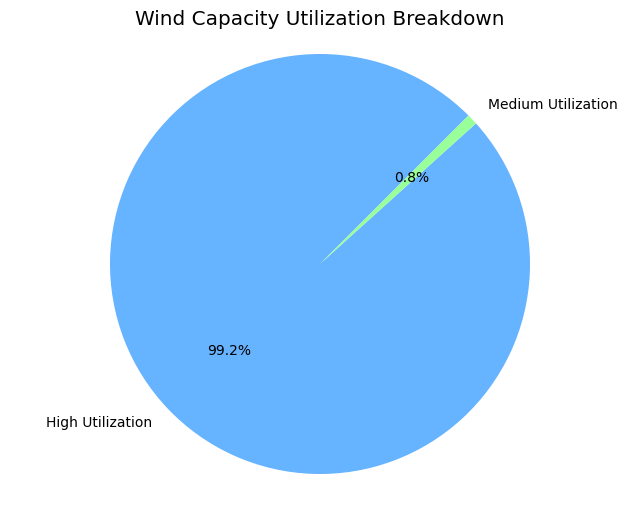

In [18]:
df['capacity_utilization'] = (df['wind_generation_actual'] / df['wind_capacity']) * 100

# Classify into High, Medium, Low
def categorize_utilization(utilization):
    if utilization > 80:
        return 'High Utilization'
    elif 40 <= utilization <= 80:
        return 'Medium Utilization'
    else:
        return 'Low Utilization'

df['utilization_category'] = df['capacity_utilization'].apply(categorize_utilization)

category_counts = df['utilization_category'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=45, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Wind Capacity Utilization Breakdown')
plt.axis('equal')  
plt.show()

### Seasonality : can be decomposed into 3 terms -
#### Trend : pattern,
#### Seasonal : Cyclical effects,
#### Residual : Error of predictions or the difference between the actual data and the model we fit
### 'Naive' decomposition :
#### additive : trend + seasonal + residual
#### multiplicative : trend * seasonal * residual

##### for more : https://github.com/SMARIFUL1/Time-Series-Analysis/blob/main/TimeSeries365.ipynb

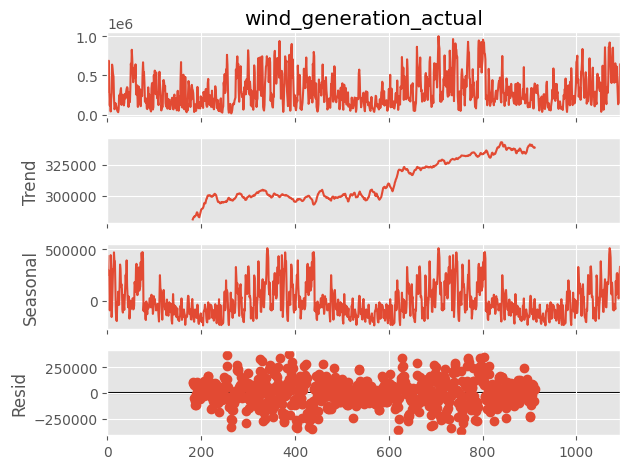

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['wind_generation_actual'], model='additive', period=365)
result.plot()
plt.show()


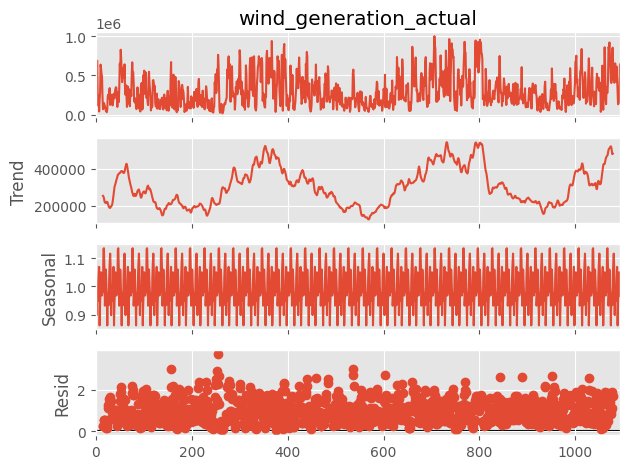

In [20]:
result = seasonal_decompose(df['wind_generation_actual'], model='multiplicative', period=30)
result.plot()
plt.show()


In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['wind_generation_actual'], order=(5, 1, 0)) 
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=30)
print(forecast)


1094    548396.601581
1095    443210.713005
1096    402345.937929
1097    396866.932842
1098    406311.884950
1099    439254.783933
1100    449958.856577
1101    442747.358463
1102    433845.101175
1103    429901.915029
1104    429096.796237
1105    431752.246118
1106    434325.824145
1107    434893.821263
1108    434127.516019
1109    433345.751962
1110    432925.739605
1111    432983.624996
1112    433276.407872
1113    433487.670514
1114    433506.861869
1115    433429.855082
1116    433350.842100
1117    433319.342137
1118    433334.027567
1119    433363.663150
1120    433380.266829
1121    433379.864272
1122    433371.321482
1123    433363.992549
Name: predicted_mean, dtype: float64


In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(df['wind_generation_actual'], trend='add', seasonal='add', seasonal_periods=30).fit()
prediction = model.forecast(30)
print('prediction for upcoming 30 days : \n', prediction)

prediction for upcoming 30 days : 
 1094    577663.142377
1095    551439.755361
1096    589447.962347
1097    599871.116843
1098    548390.088381
1099    518101.220790
1100    580248.877941
1101    621555.501803
1102    611514.166891
1103    588344.265834
1104    519792.962215
1105    490839.029998
1106    509432.053607
1107    538176.756913
1108    569515.162585
1109    612037.504694
1110    597417.478598
1111    546015.753818
1112    483974.207029
1113    500648.740472
1114    474944.868294
1115    442345.728800
1116    480542.628034
1117    476024.011752
1118    411296.267572
1119    442511.916171
1120    495719.843029
1121    515246.887411
1122    501461.204338
1123    468013.327081
dtype: float64


C:\Users\smari\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

